In [283]:
# DO you filling missing values before spliting the dataset into train and test or after
# DO you convert to numeric before spliting the dataset into train and test or after
#enter the date variable correctly
#convert others to female later in gender
#decide on date_first_booking, but ight replace with -9999 or leave it like that 
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [284]:
# Change Dates to consistent format
# . print("Fixing timestamps...")
# . df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'], format='%Y-%m-%d')
# . df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')
# . df_all['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)
# . Drop timestamp_first_active
# . Any neeed to get attribute such as if the day they booked is a weekend,weekday, monthend  from (date_account_created	timestamp_first_active	date_first_booking)
# . Drop the varibles myou did split on (date_account_created	timestamp_first_active	date_first_booking)


# . What to do to (date_first_booking) i.e the missing values

# . Take a subset of the date above 2014

# . when to do the train test spilt- before or after the preprocessing
# . do one hot encoding for the variables needed
# . Scale values if needed



In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime

In [286]:
train = pd.read_csv('train_users_2.csv', parse_dates=['date_account_created','timestamp_first_active','date_first_booking'])
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [287]:

train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [288]:
train.shape

(213451, 16)

In [289]:
train.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

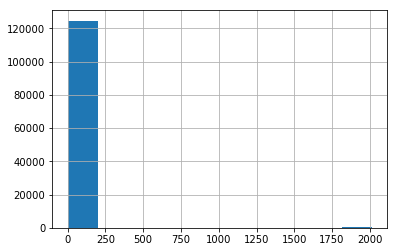

In [290]:
#fix this histogram
train['age'].hist(bins=10)
plt.show()


In [291]:
train['timestamp_first_active_to_date'] = pd.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [292]:
train['timestamp_first_active_to_date'].head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active_to_date, dtype: datetime64[ns]

In [293]:
train['timestamp_first_active_to_date'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [294]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [295]:
#impute age missing values with the median

train['age'].fillna(train['age'].median() , inplace = True)

In [296]:
#impute first_affiliate_tracked missing values with the mode

train['first_affiliate_tracked'].fillna(train['first_affiliate_tracked'].mode()[0] , inplace = True)

In [297]:
#Convert to numeric
labelencoder_X  = LabelEncoder()

train['gender'] = labelencoder_X.fit_transform(train['gender'])

In [298]:

train['language'] = labelencoder_X.fit_transform(train['language'])

In [299]:
train['affiliate_channel'] = labelencoder_X.fit_transform(train['affiliate_channel'])

In [300]:
train['affiliate_provider'] = labelencoder_X.fit_transform(train['affiliate_provider'])

In [301]:
train['first_affiliate_tracked'] = labelencoder_X.fit_transform(train['first_affiliate_tracked'])

In [302]:
train['signup_app'] = labelencoder_X.fit_transform(train['signup_app'])

In [303]:
train['first_device_type'] = labelencoder_X.fit_transform(train['first_device_type'])

In [304]:
train['first_browser'] = labelencoder_X.fit_transform(train['first_browser'])

In [305]:
train['country_destination'] = labelencoder_X.fit_transform(train['country_destination'])

In [306]:
train['signup_method'] = labelencoder_X.fit_transform(train['signup_method'])

In [307]:
#fill the date_first_booking

train['date_first_booking'].head(20)

0           NaT
1           NaT
2    2010-08-02
3    2012-09-08
4    2010-02-18
5    2010-01-02
6    2010-01-05
7    2010-01-13
8    2010-07-29
9    2010-01-04
10   2010-01-06
11          NaT
12   2010-01-18
13          NaT
14          NaT
15   2010-01-08
16          NaT
17   2010-01-09
18          NaT
19   2010-01-10
Name: date_first_booking, dtype: datetime64[ns]

In [308]:
#was a first booking made
train['first_booking_made'] = pd.notnull(train.loc[:, 'date_first_booking'])

In [309]:
#convert to integer 
train['first_booking_made'] = train['first_booking_made'].astype(int)

In [310]:
train['first_booking_made'].head()

0    0
1    0
2    1
3    1
4    1
Name: first_booking_made, dtype: int64

In [311]:
train['timestamp_first_active'] = train['timestamp_first_active'].astype(int)

In [312]:
train['timestamp_first_active'].head()

0    1237437175000000000
1    1243100889000000000
2    1244589167000000000
3    1256968889000000000
4    1260252665000000000
Name: timestamp_first_active, dtype: int64

In [313]:
train.isnull().sum(axis=0)

id                                     0
date_account_created                   0
timestamp_first_active                 0
date_first_booking                124543
gender                                 0
age                                    0
signup_method                          0
signup_flow                            0
language                               0
affiliate_channel                      0
affiliate_provider                     0
first_affiliate_tracked                0
signup_app                             0
first_device_type                      0
first_browser                          0
country_destination                    0
timestamp_first_active_to_date         0
first_booking_made                     0
dtype: int64

### FEATURE ENG.

In [314]:
# date_account_created  timestamp_first_active  date_first_booking

In [315]:
train['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

In [316]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [317]:
#convert type to date type
train['timestamp_first_active_to_date'] = pd.to_datetime(train['timestamp_first_active_to_date'])

In [318]:
train['timestamp_first_active_to_date'].head()

0   2009-03-19
1   2009-05-23
2   2009-06-09
3   2009-10-31
4   2009-12-08
Name: timestamp_first_active_to_date, dtype: datetime64[ns]

In [319]:
train['date_first_booking'].head()

0          NaT
1          NaT
2   2010-08-02
3   2012-09-08
4   2010-02-18
Name: date_first_booking, dtype: datetime64[ns]

In [320]:
train['number_of_days_btw_first_active_first_booking'] = train['date_first_booking'] - train['timestamp_first_active_to_date']

In [321]:
train['number_of_days_btw_first_active_first_booking'].head()

0         NaT
1         NaT
2    419 days
3   1043 days
4     72 days
Name: number_of_days_btw_first_active_first_booking, dtype: timedelta64[ns]

In [322]:
#do a histogram of the above number of days and put in a bin to see the most frequent

In [323]:
#get the time of the month most become active
#check if it is seasonal and maybe us the destination as hue- like a stacked bar chart


In [324]:
train['month_of_first_active'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%m'))

In [325]:
train['month_of_first_active'].head()

0    03
1    05
2    06
3    10
4    12
Name: month_of_first_active, dtype: object

In [326]:
#get the time of the month most people created their account
#check if it is seasonal and maybe us the destination as hue- like a stacked bar chart


In [327]:
train['month_account_created'] = train['date_account_created'].apply(lambda x: x.strftime('%m'))

In [328]:
train['month_of_first_booking'] =  train['date_first_booking'].map(lambda x: x.strftime('%m') if pd.notnull(x) else '')

In [331]:
from sklearn.linear_model import LogisticRegression

In [332]:
lr = LogisticRegression()

In [333]:
from sklearn.model_selection import train_test_split

In [339]:
# train_without_dates = train[['gender', 'age', 'signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','first_booking_made','month_of_first_active','month_account_created','month_of_first_booking','number_of_days_btw_first_active_first_booking', 'country_destination']]
train_without_dates = train[['gender', 'age', 'signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','first_booking_made','number_of_days_btw_first_active_first_booking', 'country_destination']]

In [340]:
train_without_dates['delta_join_booking'] = train_without_dates['number_of_days_btw_first_active_first_booking'].apply(lambda x: x.days)

/Users/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [342]:
y = train_without_dates['country_destination']
X = train_without_dates.drop(['country_destination'], axis=1)

In [337]:

# X['month_of_first_booking'] = X_train['month_of_first_booking'].apply(lambda x: x if len(x) > 0 else "0").astype(int)
# X['month_account_created'] = X_train['month_account_created'].apply(lambda x: x if len(x) > 0 else "0").astype(int)
# X['month_of_first_active'] = X_train['month_of_first_active'].apply(lambda x: x if len(x) > 0 else "0").astype(int)

TypeError: object of type 'float' has no len()

In [343]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [344]:
X_train = X_train.drop(['number_of_days_btw_first_active_first_booking','delta_join_booking'], axis=1)
X_test = X_test.drop(['number_of_days_btw_first_active_first_booking','delta_join_booking'], axis=1)

In [345]:
fitted = lr.fit(X_train, y_train)

In [346]:
fitted.score(X_test, y_test)

0.87478527520265759

In [350]:
X_test['first_booking_made'].value_counts()

0    40905
1    29534
Name: first_booking_made, dtype: int64

In [351]:
X_test.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'first_booking_made'],
      dtype='object')